# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 100)

da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [44]:
# Restrict the sample to women between 35 and 50
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2:"Female"})
dw = da.loc[(da["RIDAGEYR"] >= 35) & (da["RIDAGEYR"] < 50) & (da["RIAGENDRx"] == "Female")]
dw

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,1.0,3,34128.79,1,122,4.18,114.0,84.0,110.0,72.0,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0,Female
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,1.0,7,29007.80,2,129,0.49,104.0,62.0,100.0,62.0,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN,Female
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,1.0,7,15415.16,1,133,2.18,112.0,68.0,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0,Female
58,83845,1.0,NaN,NaN,1,2,44,4,1.0,1.0,5.0,7,21984.31,2,124,1.50,116.0,78.0,116.0,78.0,133.3,171.5,45.3,37.3,35.7,48.7,NaN,2.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,93568,1.0,NaN,1.0,1,2,46,3,1.0,2.0,3.0,1,27315.85,2,121,0.76,130.0,86.0,128.0,84.0,85.5,152.4,36.8,26.0,33.5,34.7,116.5,2.0,Female
5685,93612,2.0,2.0,NaN,2,2,36,5,1.0,5.0,1.0,4,24215.58,2,130,3.70,108.0,82.0,112.0,74.0,65.7,162.4,24.9,37.2,36.0,29.8,89.0,2.0,Female
5689,93619,NaN,NaN,NaN,2,2,44,5,2.0,2.0,1.0,7,13508.74,2,121,1.72,120.0,76.0,118.0,78.0,51.9,149.3,23.3,31.9,32.0,26.2,81.4,1.0,Female
5721,93676,1.0,NaN,2.0,2,2,35,4,1.0,5.0,3.0,2,32944.36,2,132,2.68,118.0,78.0,114.0,76.0,92.2,161.7,35.3,41.5,37.5,38.9,110.9,2.0,Female


In [45]:
# Use marital status variable to partition this sample into two groups - 
# 1. women who are currently married; 2. women who are not currently married
dw["DMDMARTLx"] = dw.DMDMARTL.replace({1:"Currently Married", (2, 3, 4, 5, 6):"Not Currently Married", 
                                       77: np.nan, 99:np.nan})
dw[["DMDEDUC2x"]] = dw.DMDEDUC2.replace({5:"Completed College", (1, 2, 3, 4):"Did not complete college", 
                                       7: np.nan, 9:np.nan})
dw

<ipython-input-45-ea91aff8e3da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dw["DMDMARTLx"] = dw.DMDMARTL.replace({1:"Currently Married", (2, 3, 4, 5, 6):"Not Currently Married",
<ipython-input-45-ea91aff8e3da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dw[["DMDEDUC2x"]] = dw.DMDEDUC2.replace({5:"Completed College", (1, 2, 3, 4):"Did not complete college",
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDMARTLx,DMDEDUC2x
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,Not Currently Married,Did not complete college
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,1.0,3,34128.79,1,122,4.18,114.0,84.0,110.0,72.0,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0,Female,Currently Married,Did not complete college
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,1.0,7,29007.80,2,129,0.49,104.0,62.0,100.0,62.0,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN,Female,Currently Married,Did not complete college
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,1.0,7,15415.16,1,133,2.18,112.0,68.0,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0,Female,Currently Married,Did not complete college
58,83845,1.0,NaN,NaN,1,2,44,4,1.0,1.0,5.0,7,21984.31,2,124,1.50,116.0,78.0,116.0,78.0,133.3,171.5,45.3,37.3,35.7,48.7,NaN,2.0,Female,Not Currently Married,Did not complete college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,93568,1.0,NaN,1.0,1,2,46,3,1.0,2.0,3.0,1,27315.85,2,121,0.76,130.0,86.0,128.0,84.0,85.5,152.4,36.8,26.0,33.5,34.7,116.5,2.0,Female,Not Currently Married,Did not complete college
5685,93612,2.0,2.0,NaN,2,2,36,5,1.0,5.0,1.0,4,24215.58,2,130,3.70,108.0,82.0,112.0,74.0,65.7,162.4,24.9,37.2,36.0,29.8,89.0,2.0,Female,Currently Married,Completed College
5689,93619,NaN,NaN,NaN,2,2,44,5,2.0,2.0,1.0,7,13508.74,2,121,1.72,120.0,76.0,118.0,78.0,51.9,149.3,23.3,31.9,32.0,26.2,81.4,1.0,Female,Currently Married,Did not complete college
5721,93676,1.0,NaN,2.0,2,2,35,4,1.0,5.0,3.0,2,32944.36,2,132,2.68,118.0,78.0,114.0,76.0,92.2,161.7,35.3,41.5,37.5,38.9,110.9,2.0,Female,Not Currently Married,Completed College


In [46]:
# Within each of these groups, calculate the proportion of women who have completed college
dx = dw[["DMDMARTLx", "DMDEDUC2x"]].dropna()
pd.crosstab(dx.DMDMARTLx, dx.DMDEDUC2x)

DMDEDUC2x,Completed College,Did not complete college
DMDMARTLx,,
Currently Married,156,266
Not Currently Married,68,255


In [47]:
dz = dx.groupby(dx.DMDMARTLx).agg({"DMDEDUC2x": [lambda x: np.mean(x=="Completed College"), np.size]})
dz.columns = ["Proportion", "Total_n"]
dz

,Proportion,Total_n
DMDMARTLx,,
Currently Married,0.369668,422
Not Currently Married,0.210526,323


In [48]:
# Calculate 95% confidence intervals for each of these proportions

# 95% CI for the proportion of females currently married who completed college
mar_com = sm.stats.proportion_confint(162, 449)  

# 95% CI for the proportion of females not currently married who completed college
nmar_com = sm.stats.proportion_confint(72, 338)  

In [49]:
print("Proportion of females currently married who completed college: 0.370", mar_com)
print("Proportion of females not currently married who completed college: 0.211", nmar_com)

Proportion of females currently married who completed college: 0.370 (0.31638193710753626, 0.4052216263668512)
Proportion of females not currently married who completed college: 0.211 (0.16936816767089768, 0.2566673352876822)


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

The confidence interval for females who are not currently married is wider. This is due to the fact that their sample size is smaller. 

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

With 95% confidence, the population proportion of females who are currently married and have completed college is estimated to be between 31.6-40.5%

With 95% confidence, the population proportion of females who are not currently married and have completed college is estimated to be between 16.9-25.7%

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [96]:
# Relabel the smoking and gender categories
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

# Tabulate the number of smokers who are female and male
ds = da[["SMQ020x", "RIAGENDRx"]].dropna()
crosstab = pd.crosstab(ds.RIAGENDRx, ds.SMQ020x)
print(crosstab,"\n")

# Calculate proportion and total for females
df = ds.groupby(ds.SMQ020x).agg({"RIAGENDRx": [lambda x: np.mean(x=="Female"), np.size]})
df.columns = ["Proportion", "Total_n"]
print("Females:\n", df,"\n")

# 95% CI for the proportion of smokers who are female
smokers_female = sm.stats.proportion_confint(906, 906+1413)
print("95% CI for the proportion of smokers who are female:", smokers_female,"\n")

# Calculate proportion and total for males
dm = ds.groupby(ds.SMQ020x).agg({"RIAGENDRx": [lambda x: np.mean(x=="Male"), np.size]})
dm.columns = ["Proportion", "Total_n"]
print("Males:\n", dm,"\n")

# 95% CI for the proportion of smokers who are male
smokers_male = sm.stats.proportion_confint(1413, 906+1413)
print("95% CI for the proportion of smokers who are male:", smokers_male,"\n")

# Calculate SE for the proportion of smokers who are female
p = df.Proportion.Yes
n = df.Total_n.Yes
se_female = np.sqrt(p * (1 - p) / n)
print("Standard Error for females:", se_female)

# Calculate SE for the proportion of smokers who are male
p = dm.Proportion.Yes
n = dm.Total_n.Yes
se_male = np.sqrt(p * (1 - p) / n)
print("Standard Error for males:", se_male)

# Calculate the SE for the difference between 
# the proportion of smokers who are female and the proportion of smokers who are male
se_diff = np.sqrt(se_female**2 + se_male**2)
print("Standard Error for the difference:", se_diff)

# 95% CI for the difference between 
# the proportion of smokers who are female and the proportion of smokers who are male
d = df.Proportion.Yes - dm.Proportion.Yes
lcb = d - 1.96*se_diff
ucb = d + 1.96*se_diff
print("95% CI for the difference in proportions:", d, "(",lcb, ucb,")")

SMQ020x      No   Yes
RIAGENDRx            
Female     2066   906
Male       1340  1413 

Females:
          Proportion  Total_n
SMQ020x                     
No         0.606577     3406
Yes        0.390686     2319 

95% CI for the proportion of smokers who are female: (0.37082779392969883, 0.41054348679475133) 

Males:
          Proportion  Total_n
SMQ020x                     
No         0.393423     3406
Yes        0.609314     2319 

95% CI for the proportion of smokers who are male: (0.5894565132052486, 0.6291722060703012) 

Standard Error for females: 0.010131740475418132
Standard Error for males: 0.010131740475418132
Standard Error for the difference: 0.014328444790780753
95% CI for the difference in proportions: -0.21862871927554983 ( -0.2467124710654801 -0.19054496748561955 )


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

The confidence intervals for the proportions of smokers who are male and female shown above are quite narrow and do not overlap. This suggests that there is a substantial difference between the lifetime smoking rates for women and men. However there is no explicit information here about how different the two population proportions might be. To address this question, we can form a confidence interval for the difference between the proportion of smokers who are female and the proportion of smokers who are male.

The point estimate of the difference between the proportion of smokers who are female to those who are male is -0.219. That is, the proportion of smokers who are male is about 20 percentage points higher than women. This difference of around 20 percentage points is only a point estimate of the underlying true value -- it is not exactly equal to the difference between the unknown proportions of females and males who smoke in the population. A confidence interval helps us assess how far the estimated difference may be from the true difference.

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

The width of the confidence interval for the difference between the gender proportions is wider compared to that for the separate gender proportions

This is probably due to the higher SE for the difference between the gender proportions compared to that of the separate gender proportions due to increased variability between the two gender groups. 

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [132]:
print("Height in cm")

# Calculate descriptive stats for height (cm)
mean = da["BMXHT"].mean()
sd = da["BMXHT"].std()
n = len(da)

print("Mean:", mean)
print("Standard Deviation:", sd)
print("No. of Observations:", n)

# Calculate SE for mean height (cm)
se = sd/np.sqrt(n)
print("SE:", se)

# Calculate 95% interval for height (cm)
tstar = 1.96
lcb = mean - tstar * se
ucb = mean + tstar * se
print("95% CI:", lcb,"-",ucb)

print("\n")

print("Height in inches")

# Convert height from cm to inches
da["BMXHTINCH"] = da.BMXHT / 2.54

# Calculate descriptive stats for height (inches)
mean = da["BMXHTINCH"].mean()
sd = da["BMXHTINCH"].std()
n = len(da)

print("Mean:", mean)
print("Standard Deviation:", sd)
print("No. of Observations:", n)

# Calculate SE for mean height (inches)
se = sd/np.sqrt(n)
print("SE:", se)

# Calculate 95% interval for height (inches)
tstar = 1.96
lcb = mean - tstar * se
ucb = mean + tstar * se
print("95% CI:", lcb,"-",ucb)

print("\n")

# Convert 95% CI from inches back to cm
lcb_cm = lcb * 2.54
ucb_cm = ucb * 2.54
print("Converted 95% CI from inches back to cm\n", lcb_cm,"-",ucb_cm)

Height in cm
Mean: 166.14283447911131
Standard Deviation: 10.079263712467688
No. of Observations: 5735
SE: 0.13309510924738813
95% CI: 165.88196806498644 - 166.4037008932362


Height in inches
Mean: 65.41056475555557
Standard Deviation: 3.9682140600266522
No. of Observations: 5735
SE: 0.052399649309995376
95% CI: 65.30786144290798 - 65.51326806820316


Converted 95% CI from inches back to cm
 165.88196806498627 - 166.40370089323602


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

The confidence interval constructed in cm is almost identical to the confidence interval constructed in inches.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [155]:
# Partition the sample based on 10-year age bands 
da["AGEBANDS"] = pd.cut(da.RIDAGEYR, bins=[17, 28, 38, 48, 58, 68, 78, 88])

# Calculate the mean, SD, and sample size for BMI within age/gender groups
pr = da.groupby(["AGEBANDS", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()

# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2) 
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "CI_width", ""] = pr["BMXBMI", "ucb_diff", ""] - pr["BMXBMI", "lcb_diff", ""] 

pr

BMXBMI                                                         \
                mean                  std             size              sem   
RIAGENDRx     Female       Male    Female      Male Female   Male    Female   
AGEBANDS                                                                      
(17, 28]   27.822776  26.969515  7.960991  6.779437  568.0  521.0  0.334036   
(28, 38]   29.943443  29.697180  7.959097  6.726690  494.0  467.0  0.358097   
(38, 48]   31.003733  29.514646  8.044642  6.104950  514.0  398.0  0.354834   
(48, 58]   30.787361  29.385132  7.647590  6.151534  454.0  419.0  0.358919   
(58, 68]   31.054664  29.232462  7.779502  5.959024  466.0  470.0  0.360378   
(68, 78]   30.537818  28.720270  6.780588  5.336652  279.0  307.0  0.405943   
(78, 88]   27.850000  27.464368  5.483781  4.695650  201.0  177.0  0.386796   

                                                                       
                    mean_diff  sem_diff  lcb_diff  ucb_diff  CI_width  
RIAGENDRx      Male                                                    
AGEBANDS                                                               
(17, 28]   0.297013  0.853261  0.446986 -0.022831  1.729353  1.752184  
(28, 38]   0.311274  0.246263  0.474473 -0.683705  1.176230  1.859935  
(38, 48]   0.306014  1.489086  0.468563  0.570703  2.407470  1.836767  
(48, 58]   0.300522  1.402230  0.468120  0.484714  2.319745  1.835031  
(58, 68]   0.274869  1.822202  0.453239  0.933853  2.710551  1.776698  
(68, 78]   0.304579  1.817548  0.507502  0.822844  2.812252  1.989407  
(78, 88]   0.352947  0.385632  0.523624 -0.640672  1.411936  2.052608

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

Text(0, 0.5, 'Female - male BMI difference')

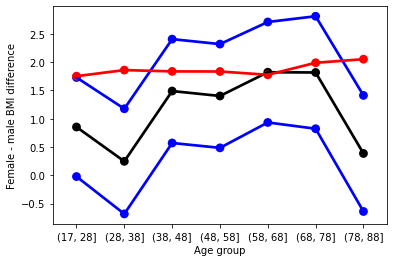

In [156]:
# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0])
pp = sns.pointplot(x, pr["BMXBMI", "mean_diff", ""], color='black')
sns.pointplot(x, pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x, pr["BMXBMI", "ucb_diff", ""], color='blue')
sns.pointplot(x, pr["BMXBMI", "CI_width", ""], color='red')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

The widths of these confidence intervals are generally similar, except for the age bands from 68 years old onwards where the confidence intervals start to increase. This is most likely due to the smaller size of respondents within this age group, causing the intervals to be wider. 

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [166]:
print("95% CI for first systolic blood pressure measurements")

# Calculate descriptive stats for BPXSY1
mean_SY1 = da["BPXSY1"].mean()
sd_SY1 = da["BPXSY1"].std()
n_SY1 = len(da)

print("Mean:", mean_SY1)
print("SD:", sd_SY1)
print("No. of Observations:", n_SY1)

# Calculate SE for BPXSY1
se_SY1 = sd_SY1/np.sqrt(n_SY1)
print("SE:", se_SY1)

# Calculate 95% interval for BPXSY1
tstar = 1.96
lcb_SY1 = mean_SY1 - tstar * se_SY1
ucb_SY1 = mean_SY1 + tstar * se_SY1
print("95% CI:", lcb_SY1,"-",ucb_SY1)

print("\n")

print("95% CI for second systolic blood pressure measurements")

# Calculate descriptive stats for BPXSY2
mean_SY2 = da["BPXSY2"].mean()
sd_SY2 = da["BPXSY2"].std()
n_SY2 = len(da)

print("Mean:", mean_SY2)
print("SD:", sd_SY2)
print("No. of Observations:", n_SY2)

# Calculate SE for BPXSY2
se_SY2 = sd_SY2/np.sqrt(n_SY2)
print("SE:", se_SY2)

# Calculate 95% interval for BPXSY2
lcb_SY2 = mean_SY2 - tstar * se_SY2
ucb_SY2 = mean_SY2 + tstar * se_SY2
print("95% CI:", lcb,"-",ucb)

print("\n")

# Calculate standard error for the difference of both means
sem_diff = np.sqrt(se_SY1**2 + se_SY2**2)
print("SEM difference:", sem_diff)

sybp_diff = mean_SY2 - mean_SY1
lcb = sybp_diff - 1.96*sem_diff
ucb = sybp_diff + 1.96*sem_diff
print("95% CI for difference in mean SY1 and SY2:", lcb,"-",ucb)

95% CI for first systolic blood pressure measurements
Mean: 125.08461396037771
SD: 18.480872651654824
No. of Observations: 5735
SE: 0.24403704821379846
95% CI: 124.60630134587866 - 125.56292657487676


95% CI for second systolic blood pressure measurements
Mean: 124.78301716350497
SD: 18.527011720295047
No. of Observations: 5735
SE: 0.24464630743713311
95% CI: 124.30351040092819 - 125.26252392608174


SEM difference: 0.345551583187703
95% CI for difference in mean SY1 and SY2: -0.9788778999206417 - 0.37568430617515414


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Yes, the 95% confidence interval for difference in mean values of the first and second systolic blood pressure measures includes 0. 

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The width of the confidence interval for the within-subject difference is wider compared to the widths of the confidence intervals for the first and second measures. This means that there is greater variability of the blood pressure readings within subject than between subjects. 

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [187]:
# Relabel smoker category into meaningful string
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})

# Calculate all the relevant values needed to compute the standard error
db = da.groupby("SMQ020x").agg({"RIDAGEYR": [np.mean, np.std, np.size]})
print(db,"\n")

# Calculate the standard error of the mean age for smokers and non-smokers
sem_nonsmoker = 18.54 / np.sqrt(3406)
sem_smoker = 17.46 / np.sqrt(2319)
print("Standard error of mean age for non-smokers:", sem_nonsmoker)
print("Standard error of mean age for smokers:", sem_smoker)

# Calculate standard error for the difference
sem_diff = np.sqrt(sem_nonsmoker**2 + sem_smoker**2)
print("Standard error for the difference in mean age:", sem_diff)

age_diff = 52.10 - 45.26
lcb = age_diff - 1.96*sem_diff
ucb = age_diff + 1.96*sem_diff
print("95% CI for mean difference:", age_diff, "(",lcb,"-",ucb,")")

          RIDAGEYR                 
              mean        std  size
SMQ020x                            
No       45.259836  18.543286  3406
Yes      52.096593  17.461141  2319 

Standard error of mean age for non-smokers: 0.3176781961181817
Standard error of mean age for smokers: 0.3625716684294791
Standard error for the difference in mean age: 0.482055651389586
95% CI for mean difference: 6.840000000000003 ( 5.895170923276415 - 7.784829076723592 )


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?